<a href="https://colab.research.google.com/github/minnnnji/Machine_Learning/blob/master/XGBoost_classifier_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns # seaborn을 불러옴.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
X=iris.drop('species',axis=1) # 'species'열을 drop하고 특성변수 X를 정의함.
y_=iris['species'] # 'species'열을 label y를 정의함.

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=123, stratify=y)

In [8]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [6]:
xgb_model = xgb.XGBClassifier()

In [7]:
xgb_model.fit(X_train,y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
fscore = xgb_model.get_booster().get_fscore()
fscore

{'petal_length': 214,
 'petal_width': 88,
 'sepal_length': 109,
 'sepal_width': 16}

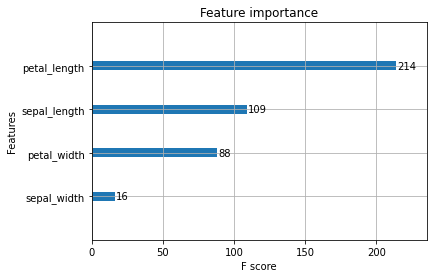

In [11]:
plot_importance(xgb_model)

In [12]:
x_train_pred = xgb_model.predict(X_train)
print('ACC : ',accuracy_score(y_train,x_train_pred))

ACC :  1.0


In [13]:
x_test_pred = xgb_model.predict(X_test)
print('ACC : ',accuracy_score(y_test,x_test_pred))

ACC :  0.95
